# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

## Цель проекта: найти взаимосвязь стоимости квартир от различных параметров и найти важные инсайты, которые позволят построить автоматизированную систему аномалий и мошеннической деятельности.

## Откроем файл с данными и изучим общую информацию.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('C:/Users/user/Desktop/юпитер/исследование квартир/real_estate_data.csv', sep='\t')

In [3]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


В данных много пропусков, в шагах ниже необходимо изучить их появление и обработать их.

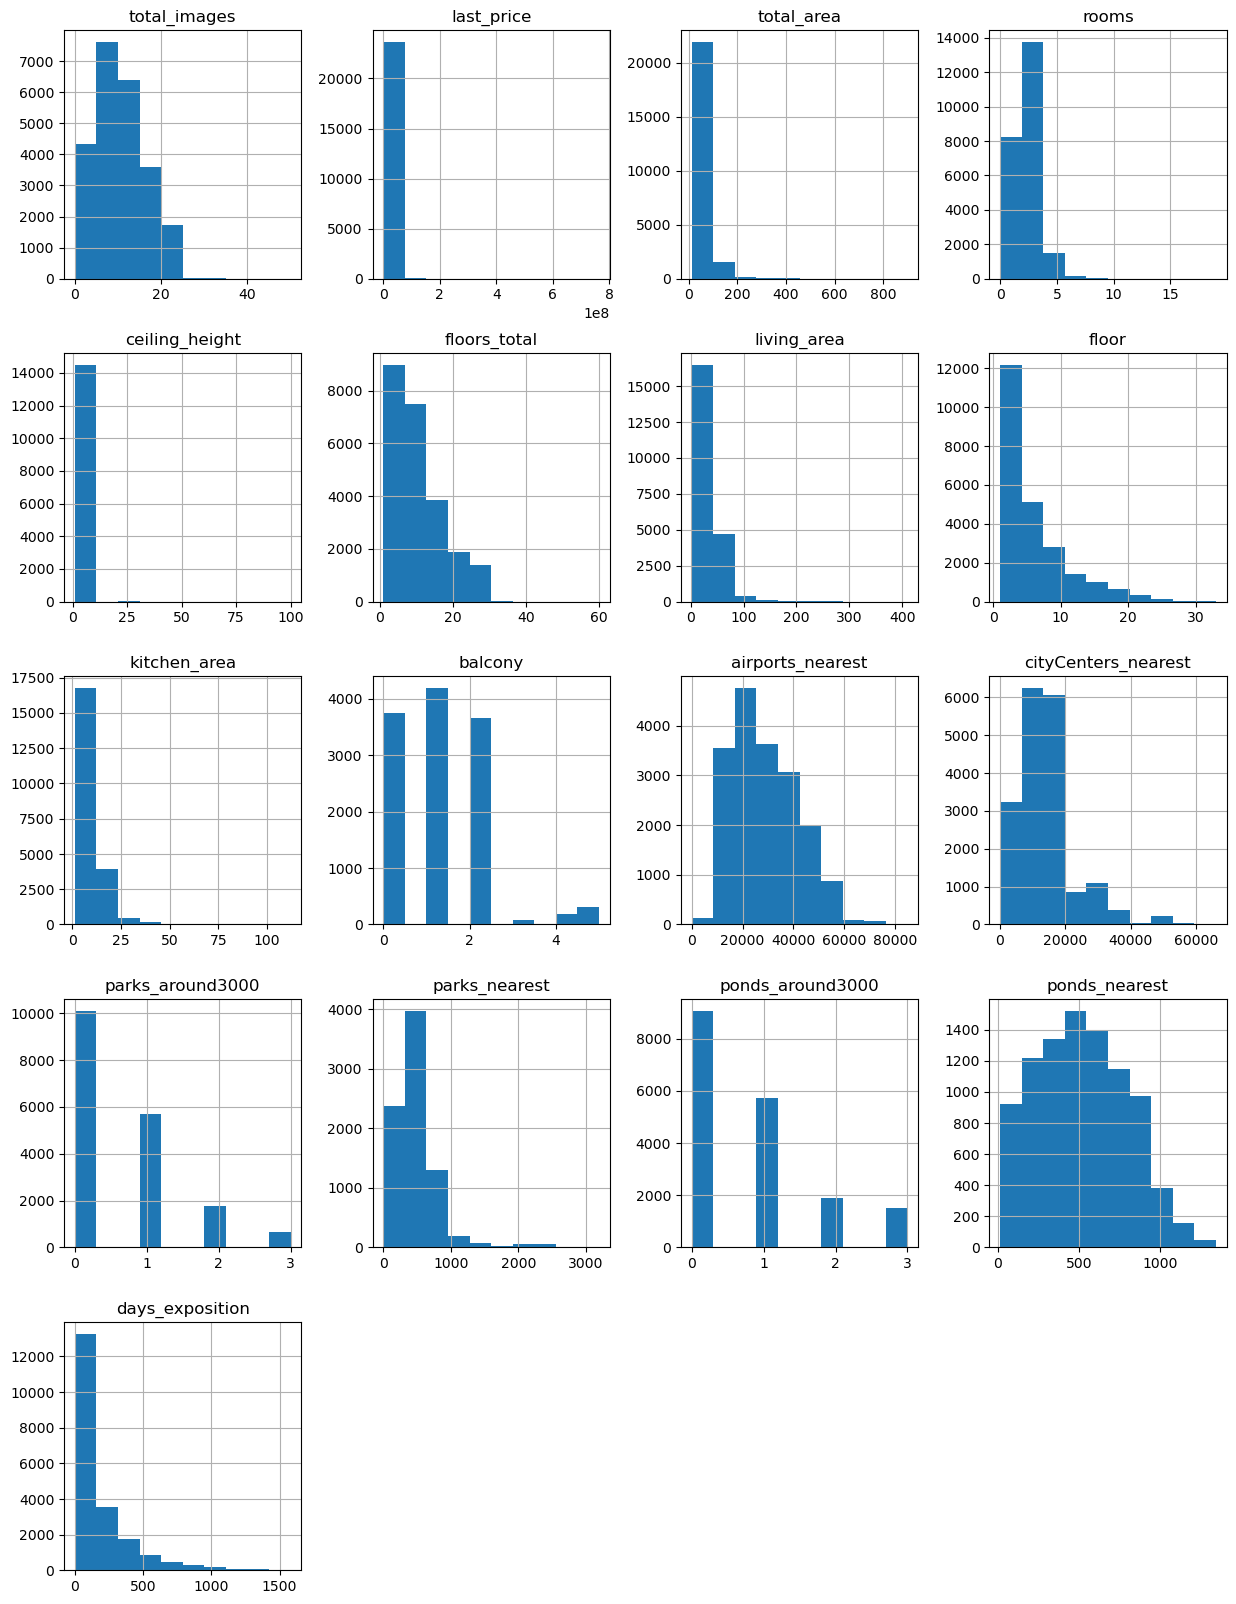

In [4]:
data.hist(figsize=(15, 20))
plt.show()

Взглянув на графики мы можем сделать первое оценочное мнение:
- total images - в среднем на одно объявление приходится около 10-15 фотографий;
- last price - данные кажутся некорректными, посмотри на них детальнее в шагах ниже;
- total area - в среднем площадь недвижимости от 0 до 100м^2, как площадь может быть 0? Детальнее рассмотрим данные в шагах ниже;
- rooms - типичная недвижимость состоит от 0 до 5 комнат;	
- ceiling_height - высота потолка от 1 до 10 метров кажутся странными. Возможно в данных есть ошибки;
- floors_total - в среднем в доме, где продаётся недвижимость, около 10 этажей, встречаются также высокоэтажные дома;
- living_area - площадь недвижимости от 0 до 70м^2, странный 0-5 снова здесь. Детальнее рассмотрим данные в шагах ниже;
- floor	- чаще всего квартира располагается на высоте от 2 до 10 этажей;
- kitchen_area - площадь кухни снова насторажает! Ошибка точно есть на площадях в этой таблице;
- balcony - количество балконов от 0 до 2 практически равномерно распределены. Интересно, у всех балконы забиты вещами?))	
- airports_nearest - у многой недвижимости аэропорт расположен относительно близко. Пользуются ли они этим?)
- cityCenters_nearest - в среднем недвижимость располагается от 5 до 20км от центра города, неплохо, но и есть более высокие значения, возможно эта недвижимость расположена на окраинах, либо в поселках/деревнях;
- parks_around3000 - Ого! У многой недвижимости есть парк в ближайших 3х км, а у кого-то даже несколько;	
- ponds_around3000	- аналогичная ситуация с водоёмами, возможно комары будут беспокоить;
- days_exposition - в среднем недвижимость продаётся очень быстро, от 0 до 200 дней. И тут этот 0, нужно разобраться в чем дело;  
  
Рассмотрев детальнее графики мы можем сделать вывод, что в некоторых столбцах данные не бьются и есть аномалии, необходимо рассмотреть более детально данные, которые кажутся сомнительными.

## Выполним предобработку данных.

### Рассмотрим типы данных в каждом столбце.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Найдём и изучим пропущенные значения в столбцах.

Чтобы перейти к предобработке данных, необходимо найти количество пропусков в каждом столбце

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [8]:
import missingno as msno

### Изучим уникальные значения в столбце с названиями и устраним неявные дубликаты.

Высоту потолков у пропусков можно медианым средним значением, чтобы квартиры с большими потолками не исказили данные.

In [9]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В столбце "floors_total" логически не сможем заменить пропуски, тк этажей в доме может быть разное количество и данные окажутся некорректными.

На жилую площадь влияет количество комнат. Заменим пропуски в этом столбце медианным значением, исходя из количества комнат.

In [10]:
rooms_grouped = data.groupby('rooms')['living_area'].median()
data['living_area'] = data.set_index('rooms')['living_area'].fillna(rooms_grouped).reset_index(drop=True)
data.isna().sum()


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Столбец "is_apartment" является булевым и указывает на то, является ли недвижимость апартмаментами. Где пропуски, логично что не является апартмаментами и необходимо заменить на False

In [11]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Большинство кухонь имеют типичную площадь, заменим эти значения медианным значением.

In [12]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Столбец "balcony" указывает на то, есть ли балкон в квартире. Логично, что где пропуск, там нет его, поэтому заменим пропуски на "0".

In [13]:
data['balcony'] = data['balcony'].fillna(0)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропуски в столбце "locality_name" нет возможности обработать пропуски, тк это название населённого пункта.  
Также не сможем обработать данные в столбцах: airports_nearest, cityCenters_nearest, parks_around3000, ponds_around3000, ponds_nearest, тк нет возможности их логически заменить.  
Столбец days_exposition указывает на то, сколько дней недвижимость была в продаже. Если есть пропуск, соответственно недвижимость ещё не продана и заменить его не нужно.

Причинами пропусков в столбцах в большинстве случаев является человеческий фактор (большое количество категорий, на которые владелец может не знать ответ).  
Также причинами пропусков могут быть технические проблемы, в следствии выгрузки данных.

Необходимо поменять тип данных в столбце "first_day_exposition", чтобы данные имели читаемый вид.  

In [14]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,45.0,9,False,...,9.1,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


В столбце "locality_name" могут находиться разные наименования одного населённого пункта. Необходимо проверить названия, если будут схожие названия, то заменить их.

In [15]:
display(data['locality_name'].nunique())
display(data['locality_name'].sort_values().unique())

364

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

В данных встречаются много однотипных видов поселков, необходимо их заменить на "поселок", а также поменять букву "ё" на "е", чтобы обработать неявные дубликаты.

In [16]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок городского типа', 'посёлок при железнодорожной', 'городской поселок', 'коттеджный поселок', 'поселок при железнодорожной станции', 'поселок станции'], 'поселок', regex=True)
) # меняем букво "ё" на "е" и заменяем разные виды поселков на "поселок", чтобы убрать неявные дубликаты.

display(data['locality_name'].nunique())
display(data['locality_name'].sort_values().unique())

318

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

## Добавим в таблицу новые столбцы.

Добавляем в таблицу новые столбцы со следующими данными:   
- цена за квадратный метр;
- день недели;
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры;
- расстояние до центра города в км.

In [17]:
data['cost_m'] = round(data['last_price'] / data['total_area'], 2) # стоимость за 1 кв.м.

data['weekday_exposition'] = data['first_day_exposition'].dt.weekday # день недели
data['month_exposition'] = data['first_day_exposition'].dt.month # месяц
data['year_exposition'] = data['first_day_exposition'].dt.year # год

data['city_centers_km'] = round(data['cityCenters_nearest'] / 1000, 0) # расстояние до центра, км

def type_floor(row): # содаём функцию для определения типа этажа
    floor = row['floor']
    total_floor = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == total_floor:
        return 'последний'
    else:
        return 'другой'

data['type_floor'] = data.apply(type_floor, axis=1)

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_m,weekday_exposition,month_exposition,year_exposition,city_centers_km,type_floor
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,16.0,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,19.0,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,14.0,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,45.0,9,False,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,7.0,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,8.0,другой


## Проведём исследовательский анализ данных.

### Изучим перечисленные ниже параметры объектов и построем отдельные гистограммы для каждого из этих параметров.

Необходимо проверить следующие столбцы на наличие аномальных значений, при необходимо их изменить, либо убрать их из данных:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего парка

Необходимо создать новую переменную new_data, в которой будем корректировать аномальные значения.  
Затем анализирируем уникальные значения и строим график столбца "total_area"

array([ 12. ,  13. ,  13.2, ..., 631. , 631.2, 900. ])

<Axes: >

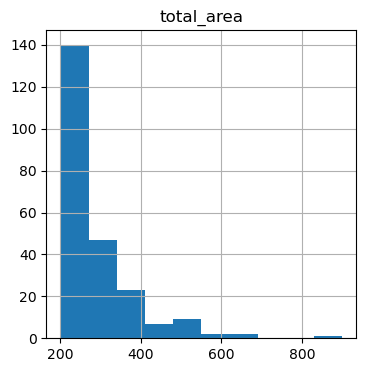

In [18]:
new_data = data
display(new_data['total_area'].sort_values().unique())
display(new_data['total_area'].hist(figsize=(4,4),range=(200, 900)))
plt.title('total_area')
plt.show()


На графике видно, что имеется недвижимость свыше 250м. Отбросим эти значения, которые выше этого значения, тк эта недвижимость с большой квадратурой и может исказить дальнейшиий анализ. 
Минимальное значений общей площади недвижимости равняется 12. Это может быть в действительности, тк в данных могут быть комнаты/студии общежитий, эти данные оставляем

In [19]:
new_data= new_data.query('total_area < 250')

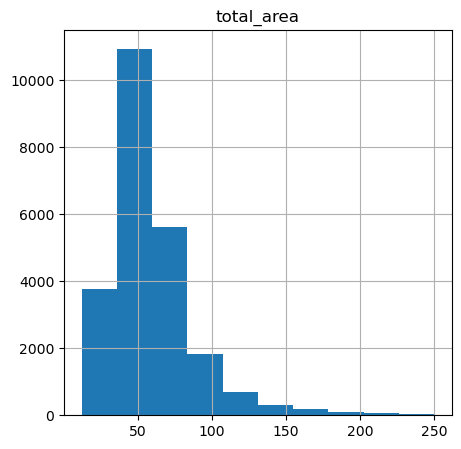

In [20]:
new_data['total_area'].hist(figsize=(5,5))
plt.title('total_area')
plt.show()

Анализируем столбец "жилая площадь"

array([  2.,   3.,   5., ..., 184., 200., 220.])

<Axes: >

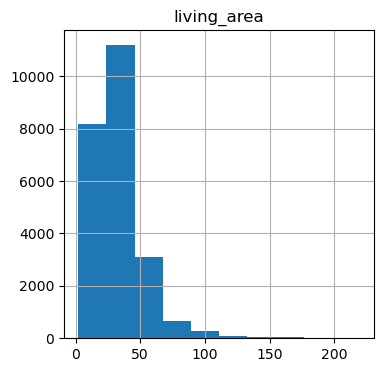

In [21]:
display(new_data['living_area'].sort_values().unique())
display(new_data['living_area'].hist(figsize=(4,4)))
plt.title('living_area')
plt.show()

Есть значения жилой площади от 2м^2, эти данные рассмотрим детальнее.

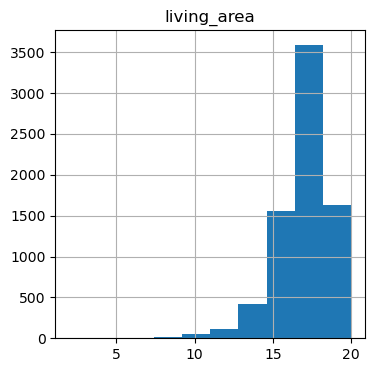

In [22]:
new_data['living_area'].hist(figsize=(4,4), range=(2, 20))
plt.title('living_area')
plt.show()

В теории недвижимость с жилой площадью может быть до 10м, но для корректности данные отбросим аномально низкие значений жилой площади до 10м

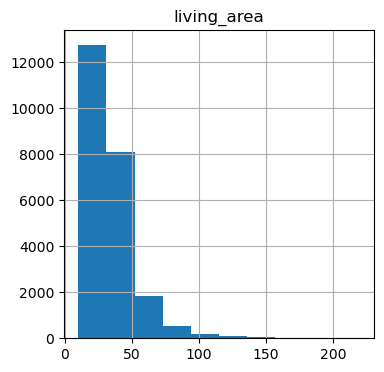

In [23]:
new_data = new_data.query('living_area >=10')
new_data['living_area'].hist(figsize=(4,4))
plt.title('living_area')
plt.show()

Изучим данные в столбце "kitchen_area"

array([  1.3 ,   2.  ,   2.3 ,   2.4 ,   2.89,   3.  ,   3.2 ,   3.3 ,
         3.4 ,   3.5 ,   3.7 ,   3.8 ,   4.  ,   4.1 ,   4.2 ,   4.3 ,
         4.4 ,   4.5 ,   4.6 ,   4.7 ,   4.8 ,   4.9 ,   5.  ,   5.04,
         5.06,   5.1 ,   5.14,   5.2 ,   5.21,   5.23,   5.25,   5.28,
         5.29,   5.3 ,   5.31,   5.33,   5.35,   5.4 ,   5.42,   5.44,
         5.47,   5.49,   5.5 ,   5.53,   5.59,   5.6 ,   5.61,   5.62,
         5.64,   5.65,   5.68,   5.7 ,   5.74,   5.75,   5.78,   5.8 ,
         5.82,   5.85,   5.86,   5.9 ,   5.91,   6.  ,   6.02,   6.03,
         6.1 ,   6.16,   6.19,   6.2 ,   6.22,   6.23,   6.24,   6.25,
         6.26,   6.27,   6.28,   6.3 ,   6.31,   6.33,   6.35,   6.36,
         6.37,   6.4 ,   6.47,   6.5 ,   6.55,   6.58,   6.6 ,   6.61,
         6.62,   6.65,   6.7 ,   6.72,   6.73,   6.76,   6.77,   6.8 ,
         6.82,   6.83,   6.84,   6.86,   6.9 ,   6.91,   6.93,   6.95,
         7.  ,   7.02,   7.03,   7.06,   7.09,   7.1 ,   7.12,   7.15,
      

<Axes: >

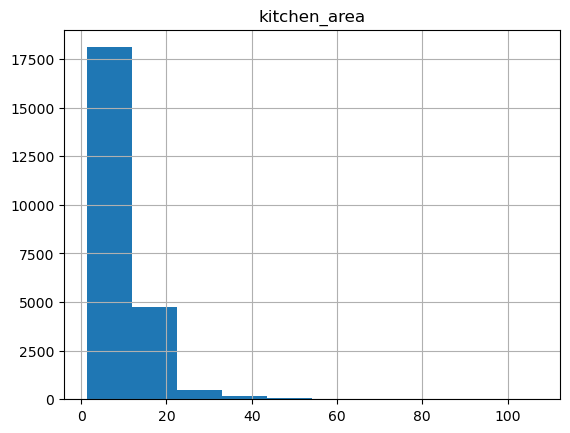

In [24]:
display(new_data['kitchen_area'].sort_values().unique()) 
display(new_data['kitchen_area'].hist()) 
plt.title('kitchen_area')
plt.show()

В данных также есть большие и малые значения площади кухни.  
В квартирах-студиях могут быть кухни с малой площадью (выделенной под кухню), поэтому оставим значения свыше 3м.  
Уберём из данных аномально большие значения кухонь с площадью более 30м, тк в больших домах есть большие кухни.

<Axes: >

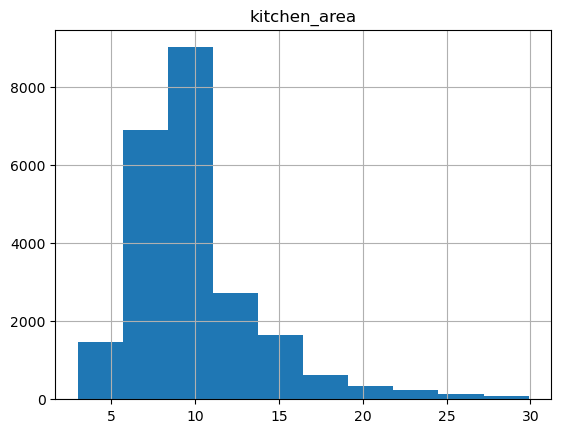

In [25]:
new_data = new_data.query('kitchen_area >= 3 and kitchen_area < 30')
display(new_data['kitchen_area'].hist()) 
plt.title('kitchen_area')
plt.show()

Изучим стоимость квартир. Для корректности отображения создадим новый столбец стоимости квартир в млн. руб, округленный до 1 знака после запятой.

In [26]:
new_data['price_mln'] = round(new_data['last_price']/1000000, 1)
new_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,cost_m,weekday_exposition,month_exposition,year_exposition,city_centers_km,type_floor,price_mln
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,2.0,755.0,NaN,120370.37,3,3,2019,16.0,другой,13.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,0.0,NaN,81.0,82920.79,1,12,2018,19.0,первый,3.4
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,2.0,574.0,558.0,92785.71,3,8,2015,14.0,другой,5.2
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,45.0,9,False,...,3.0,234.0,424.0,408176.10,4,7,2015,7.0,другой,64.9
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,False,...,NaN,NaN,55.0,95065.79,0,9,2018,NaN,другой,2.9


array([  0.4,   0.5,   0.6,   0.7,   0.8,   0.9,   1. ,   1.1,   1.2,
         1.3,   1.4,   1.5,   1.6,   1.7,   1.8,   1.9,   2. ,   2.1,
         2.2,   2.3,   2.4,   2.5,   2.6,   2.7,   2.8,   2.9,   3. ,
         3.1,   3.2,   3.3,   3.4,   3.5,   3.6,   3.7,   3.8,   3.9,
         4. ,   4.1,   4.2,   4.3,   4.4,   4.5,   4.6,   4.7,   4.8,
         4.9,   5. ,   5.1,   5.2,   5.3,   5.4,   5.5,   5.6,   5.7,
         5.8,   5.9,   6. ,   6.1,   6.2,   6.3,   6.4,   6.5,   6.6,
         6.7,   6.8,   6.9,   7. ,   7.1,   7.2,   7.3,   7.4,   7.5,
         7.6,   7.7,   7.8,   7.9,   8. ,   8.1,   8.2,   8.3,   8.4,
         8.5,   8.6,   8.7,   8.8,   8.9,   9. ,   9.1,   9.2,   9.3,
         9.4,   9.5,   9.6,   9.7,   9.8,   9.9,  10. ,  10.1,  10.2,
        10.3,  10.4,  10.5,  10.6,  10.7,  10.8,  10.9,  11. ,  11.1,
        11.2,  11.3,  11.4,  11.5,  11.6,  11.7,  11.8,  11.9,  12. ,
        12.1,  12.2,  12.3,  12.4,  12.5,  12.6,  12.7,  12.8,  12.9,
        13. ,  13.1,

<Axes: >

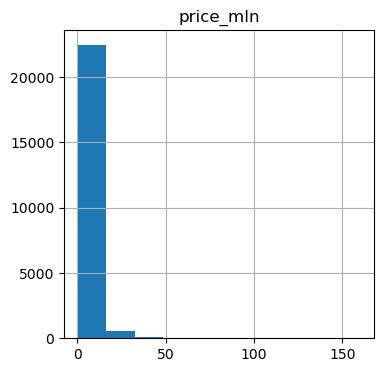

In [27]:
display(new_data['price_mln'].sort_values().unique())
display(new_data['price_mln'].hist(figsize=(4,4)))
plt.title('price_mln')
plt.show()

Текущие данные оставлем без изменений, тк на стоимость влияют большое количество факторов.

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 14], dtype=int64)

<Axes: >

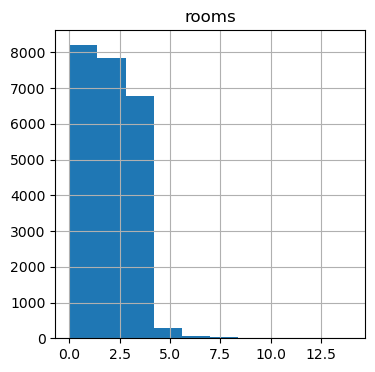

In [28]:
display(new_data['rooms'].sort_values().unique())
display(new_data['rooms'].hist(figsize=(4, 4)))
plt.title('rooms')
plt.show()

Значения также не корректируем, 0 скорее всего это студии.   
Изучим данные в столбце "ceiling_height"

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

<Axes: >

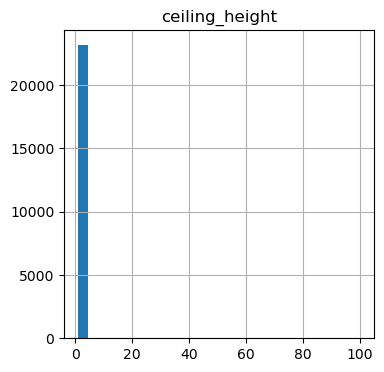

In [29]:
display(new_data['ceiling_height'].sort_values().unique()) 
display(new_data['ceiling_height'].hist(bins=30, figsize=(4,4)))
plt.title('ceiling_height')
plt.show()

Некоторые виды элитной недвижимости могут предполагать высоту потолков до 10м (3х уровневая недвижимость), оставляем данные до высоты потолка 3.5м.  
Недвижимость высотой от 24 до 32 могли быть записаны некорректно (без запятой), разделим эти данные на 10, чтобы перевести в метры.  
100м недвижимость убираем из данных, чтобы не влияли на корректность в дальнейшем анализе.  
Высоту потолков до 2.4м также удаляем.

array([2.4 , 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53, 2.54,
       2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64, 2.65,
       2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75, 2.76,
       2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87,
       2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98,
       2.99, 3.  , 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09,
       3.1 , 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.2 , 3.21,
       3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.29, 3.3 , 3.31, 3.32,
       3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4 , 3.42, 3.43, 3.44,
       3.45, 3.46, 3.47, 3.48, 3.49, 3.5 ])

<Axes: >

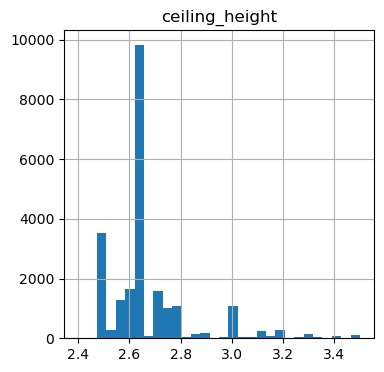

In [30]:
new_data.loc[new_data['ceiling_height'].between(24, 32), 'ceiling_height'] = new_data.loc[new_data['ceiling_height'].between(24, 32), 'ceiling_height'] / 10
new_data = new_data.query('ceiling_height <=3.5 and ceiling_height >=2.4')
display(new_data['ceiling_height'].sort_values().unique()) 
display(new_data['ceiling_height'].hist(bins=30, figsize=(4,4)))
plt.title('ceiling_height')
plt.show()

Рассмотрим столбец "floors_total".

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 33., 34., 35., 36., 52., 60., nan])

<Axes: >

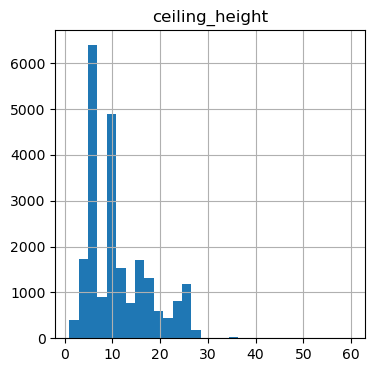

In [31]:
display(new_data['floors_total'].sort_values().unique()) 
display(new_data['floors_total'].hist(bins=30, figsize=(4,4)))
plt.title('ceiling_height')
plt.show()

В России самое большое многоэтажное здание в 87 этажей находится в Санкт-Петербурге, поэтому максимальный этаж в 52 и 60 имеет место быть.  
Изучим столбцы "cityCenters_nearest" и "parks_nearest".

array([[<Axes: title={'center': 'cityCenters_nearest'}>,
        <Axes: title={'center': 'parks_nearest'}>]], dtype=object)

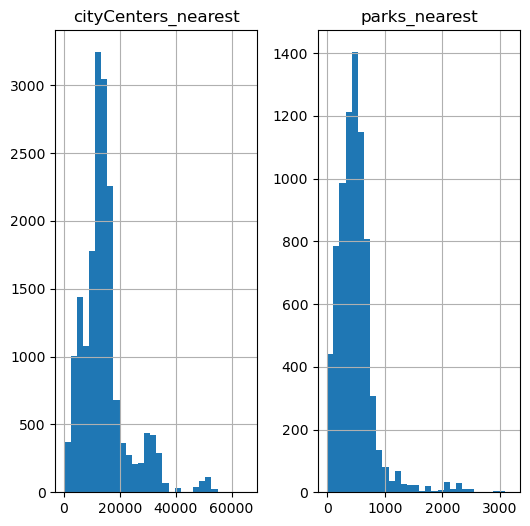

In [32]:
display(new_data[['cityCenters_nearest', 'parks_nearest']].hist(bins=30, figsize=(6,6)))


В данных много недвижимости в посёлках, в связи с этим могут быть данные с большим расстоянием до центра города.  
Данные оставляем без корректировок.

### Изучим, как быстро продавались квартиры.

Проанализируем столбец "days_exposition", который показывает количество дней публикации объявления и построим график.

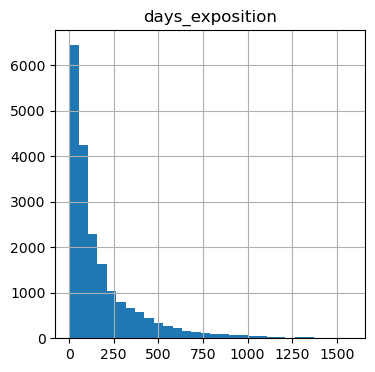

In [33]:
new_data['days_exposition'].hist(bins=30, figsize=(4,4))
plt.title('days_exposition')
plt.show()

На графике есть аномально низкие и высокие значения, рассмотрим их подробнее

<Axes: >

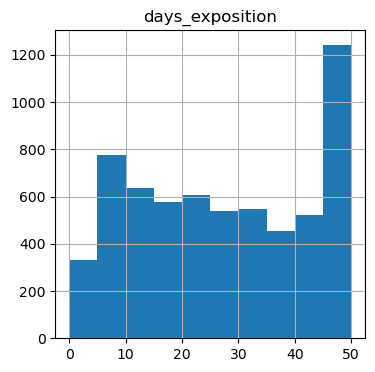

In [34]:
display(new_data['days_exposition'].hist(figsize=(4,4), range=(0, 50)))
plt.title('days_exposition')
plt.show()

На графике имеются данные, равные 0 дням в публикации. Возможно эти объявления выложили и закрыли сразу, тк данные были некорректны, либо площадка продажи удалила публикацию в связи с нарушением условий публикации.  
Причинами удалений могут являться мошеннические действия, публикация нескольких объявлений одной и тоже недвижимости, либо другие причины.
В связи с этим удаляем объявления до 1 дня в публикации.

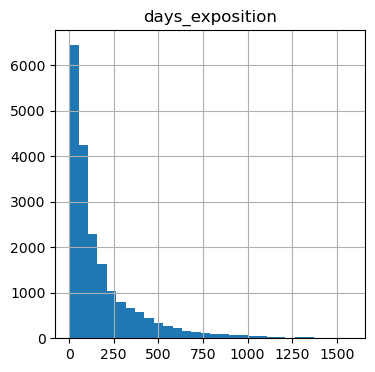

In [35]:
new_data= new_data.query('days_exposition >=1')
new_data['days_exposition'].hist(bins=30, figsize=(4,4))
plt.title('days_exposition')
plt.show()

Найдём среднее и медианной значений по данному столбцу и округлим среднее до целого значения.

In [36]:
days_exposition_mean = round(new_data['days_exposition'].mean(), 0)
days_exposition_median = new_data['days_exposition'].median()
print('Среднее количество дней продажи недвижимости:', days_exposition_mean)
print('Медианое количество дней продажи недвижимости:', days_exposition_median)

Среднее количество дней продажи недвижимости: 178.0
Медианое количество дней продажи недвижимости: 94.0


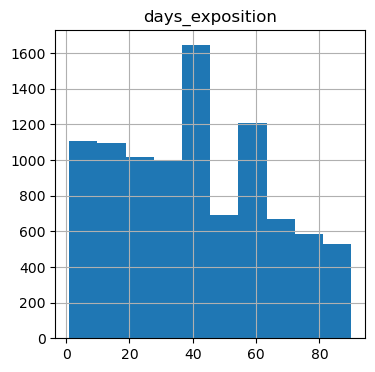

In [37]:
new_data['days_exposition'].hist(figsize=(4,4), range=(1, 90))
plt.title('days_exposition')
plt.show()

Исходя из полученных данных в среднем на продажу недвижимости уходит 178 дней (6 месяцев).  
Быстрыми продажами могут считаться от 1 до 60 дней. Причинами данных продаж может стать выкуп недвижимости агенствами недвижимости, также некоторые площадки предлагают выкуп квартиры своими силами за короткий срок.



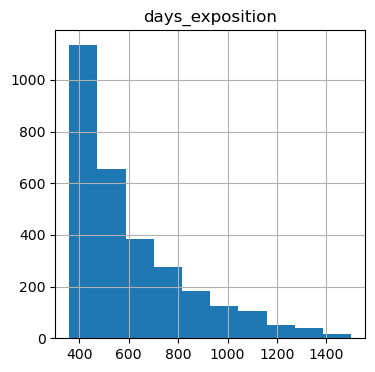

In [38]:
new_data['days_exposition'].hist(figsize=(4,4), range=(360, 1500))
plt.title('days_exposition')
plt.show()

Проанализировав данный график мы  можем сделать вывод, что сверхдолгими продажами недвижимости могут считаться свыше 700 дней (почти 2 года).  
Причинами подобных длительных продаж могут стать:
- далекое местоположение от города (посёлки);
- элитная недвижимость с высокой стоимостью и большой квадратурой;
- завышенная стоимость квартиры, по сравнению;
- плохое состояние недвижимости и многие другие факторы.

### Найдём факторы, которые больше всего влияют на общую (полную) стоимость объекта.

Найдём зависимость цены от общей площади недвижимости.  
Для этого создадим новый столбец на 8 категорий общей площади:
- от 100м и более;
- от 70 до 100м;
- от 60 до 70м;
- от 50 до 60м;
- от 40 до 50м;
- от 30 до 40м;
- от 20 до 30м;
- от 12 до 20м.

In [39]:
def area(meters):
    if meters > 100:
        return 'от 100 и более'
    if meters > 70:
        return 'от 70 до 100м'
    if meters > 60:
        return 'от 60 до 70м'
    if meters > 50:
        return 'от 50 до 60м'
    if meters > 40:
        return 'от 40 до 50м'   
    if meters > 30:
        return 'от 30 до 40м'
    if meters > 20:
        return 'от 20 до 30м'
    else:
        return'от 12 до 20м'
new_data['total_area_group'] = new_data['total_area'].apply(area)
new_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,cost_m,weekday_exposition,month_exposition,year_exposition,city_centers_km,type_floor,price_mln,total_area_group
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,NaN,81.0,82920.79,1,12,2018,19.0,первый,3.4,от 40 до 50м
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,574.0,558.0,92785.71,3,8,2015,14.0,другой,5.2,от 50 до 60м
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,45.0,9,False,...,234.0,424.0,408176.10,4,7,2015,7.0,другой,64.9,от 100 и более
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,False,...,NaN,55.0,95065.79,0,9,2018,NaN,другой,2.9,от 30 до 40м
6,6,3700000.0,37.3,2017-11-02,1,2.65,26.0,10.6,6,False,...,NaN,155.0,99195.71,3,11,2017,19.0,другой,3.7,от 30 до 40м


In [40]:
price_total_area_group = round(new_data.pivot_table(index='total_area_group', values='price_mln', aggfunc='mean').sort_values(by='price_mln'), 2)
price_total_area_group

,price_mln
total_area_group,
от 12 до 20м,1.98
от 20 до 30м,2.73
от 30 до 40м,3.40
от 40 до 50м,4.04
от 50 до 60м,4.91
от 60 до 70м,6.05
от 70 до 100м,8.24
от 100 и более,18.02


Проанализировав полученные данные мы можем сделать вывод, что общая площадь влияет на итогую стоимость квартиры.  
Стоимость квартиры увеличивается от площади квартиры - чем выше общая площадь, тем выше цена.

Найдём зависимость цены от жилой площади недвижимости.  
Для этого создадим новый столбец на 8 категорий жилой площади:
- от 100м и более;
- от 70 до 100м;
- от 60 до 70м;
- от 50 до 60м;
- от 40 до 50м;
- от 30 до 40м;
- от 20 до 30м;
- от 10 до 20м.

In [41]:
def living_group(meters):
    if meters > 100:
        return 'от 100 от 150м'
    if meters > 70:
        return 'от 70 до 100м'
    if meters > 60:
        return 'от 60 до 70м'
    if meters > 50:
        return 'от 50 до 60м'
    if meters > 40:
        return 'от 40 до 50м'   
    if meters > 30:
        return 'от 30 до 40м'
    if meters > 20:
        return 'от 20 до 30м'
    else:
        return'от 10 до 20м'
new_data['living_area_group'] = new_data['living_area'].apply(living_group)
new_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,cost_m,weekday_exposition,month_exposition,year_exposition,city_centers_km,type_floor,price_mln,total_area_group,living_area_group
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,81.0,82920.79,1,12,2018,19.0,первый,3.4,от 40 до 50м,от 10 до 20м
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,558.0,92785.71,3,8,2015,14.0,другой,5.2,от 50 до 60м,от 30 до 40м
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,45.0,9,False,...,424.0,408176.10,4,7,2015,7.0,другой,64.9,от 100 и более,от 40 до 50м
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,False,...,55.0,95065.79,0,9,2018,NaN,другой,2.9,от 30 до 40м,от 10 до 20м
6,6,3700000.0,37.3,2017-11-02,1,2.65,26.0,10.6,6,False,...,155.0,99195.71,3,11,2017,19.0,другой,3.7,от 30 до 40м,от 10 до 20м


In [42]:
price_living_area_group = round(new_data.pivot_table(index='living_area_group', values='price_mln', aggfunc='mean').sort_values(by='price_mln'), 2)
price_living_area_group

,price_mln
living_area_group,
от 10 до 20м,3.63
от 20 до 30м,4.27
от 30 до 40м,5.58
от 40 до 50м,6.58
от 50 до 60м,9.60
от 60 до 70м,12.14
от 70 до 100м,17.52
от 100 от 150м,25.87


Проанализировав полученные данные мы также видим, что на стоимость недвижимости напрямую влияет жилая площадь, как и общая жилая площадь.

Найдём зависимость цены от жилой площади недвижимости.  
Для этого создадим новый столбец на 8 категорий площади кухни:
- от 30 до 35;
- от 25 до 30м;
- от 20 до 25м;
- от 17 до 20м;
- от 13 до 17м;
- от 10 до 13м;
- от 7 до 10м;
- от 3 до 7м.

In [43]:
def kitchen_area_group(meters):
    if meters > 30:
        return 'от 30 до 35'
    if meters > 25:
        return 'от 25 до 30м'
    if meters > 20:
        return 'от 20 до 25м'
    if meters > 17:
        return 'от 17 до 20м'
    if meters > 13:
        return 'от 13 до 17м'   
    if meters > 10:
        return 'от 10 до 13м'
    if meters > 7:
        return 'от 7 до 10м'
    else:
        return'от 3 до 7м'
new_data['kitchen_area_group'] = new_data['kitchen_area'].apply(kitchen_area_group)
new_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cost_m,weekday_exposition,month_exposition,year_exposition,city_centers_km,type_floor,price_mln,total_area_group,living_area_group,kitchen_area_group
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,82920.79,1,12,2018,19.0,первый,3.4,от 40 до 50м,от 10 до 20м,от 10 до 13м
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,92785.71,3,8,2015,14.0,другой,5.2,от 50 до 60м,от 30 до 40м,от 7 до 10м
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,45.0,9,False,...,408176.10,4,7,2015,7.0,другой,64.9,от 100 и более,от 40 до 50м,от 7 до 10м
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,False,...,95065.79,0,9,2018,NaN,другой,2.9,от 30 до 40м,от 10 до 20м,от 7 до 10м
6,6,3700000.0,37.3,2017-11-02,1,2.65,26.0,10.6,6,False,...,99195.71,3,11,2017,19.0,другой,3.7,от 30 до 40м,от 10 до 20м,от 13 до 17м


In [44]:
price_kitchen_area_group = round(new_data.pivot_table(index='kitchen_area', values='price_mln', aggfunc='mean').sort_values(by='price_mln'), 2)
price_living_area_group

,price_mln
living_area_group,
от 10 до 20м,3.63
от 20 до 30м,4.27
от 30 до 40м,5.58
от 40 до 50м,6.58
от 50 до 60м,9.60
от 60 до 70м,12.14
от 70 до 100м,17.52
от 100 от 150м,25.87


Исходя из графика выше мы видим, что площадь кухни влияет на стоимость недвижимости, но нельзя утверждать данную гипотезу, тк с увеличением общей площади увеличивается и площадь кухни, которая напрямую влияет на стоимость.  
Данная гипотеза находится под сомнением.

Найдём зависимость цены от количества комнат.  

In [45]:
price_rooms = round(new_data.pivot_table(index='rooms', values='price_mln', aggfunc='mean').sort_values(by='price_mln'), 2)
price_rooms

,price_mln
rooms,
0,2.94
1,3.76
2,5.29
3,7.40
4,11.13
10,15.50
5,16.31
9,17.00
6,20.03


Проанализировав полученные данные мы может придти к выводу, что количество комнат напрямую не влияет на стоимость недвижимости.  
К примеру, 10 комнатная стоит дешевле 5,9,6,7 и 8 комнатных, а 14 и 11 стоит дешевле 8 комнатной.  

In [46]:
price_type = round(new_data.pivot_table(index='type_floor', values='price_mln', aggfunc='mean').sort_values(by='price_mln'), 2)
price_type

,price_mln
type_floor,
первый,4.35
последний,5.43
другой,5.87


Исходя из таблицы выше мы можем сделать вывод, что тип этажа, на которой располагается недвижимость, влияет на стоимость квартиры.  
Самой дешевыми являются квартиры, располагающиеся на первом этаже (в среднем дешевле на 1.08 млн, по сравнению с последним этажем), затем идут на последнем этаже (в среднем дешевле на 0.44 млн, по сравнению с "другими").  
Корректность этих выводов можно поставить под сомнение, тк недвижимость, располагаемая на первом этаже, может находиться в посёлках и деревнях, где стоимость недвижимости ниже, что могло повлиять на корректность полученных данных.

Найдём зависимость цены от дня публикации объявления.  

In [47]:
price_weekday = round(new_data.pivot_table(index='weekday_exposition', values='price_mln', aggfunc='mean').sort_values(by='price_mln'), 2)
price_weekday

,price_mln
weekday_exposition,
6,5.46
0,5.50
4,5.54
1,5.64
2,5.65
5,5.67
3,5.81


Проанализировав полученные данные мы можем сделать вывод, что день публикации никак не влияет на стоимость недвижимости, тк значения во всех днях недели колеблятся от 5.46 до 5.81 млн.

### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

Найдём среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [48]:
new_data['avg_square_meter'] = round(new_data['last_price'] / new_data['total_area'], 0)
locality_name_group = round(new_data.pivot_table(index='locality_name', values='avg_square_meter', aggfunc='mean').sort_values(by='avg_square_meter', ascending=False), 2)
locality_name_group.head(10)

,avg_square_meter
locality_name,
Зеленогорск,111332.29
Санкт-Петербург,109861.95
Пушкин,101315.58
Сестрорецк,101282.03
поселок Лисий Нос,100661.00
Кудрово,98507.94
поселок Левашово,96998.00
деревня Мистолово,96157.22
деревня Кудрово,92542.29


Интересно, но факт - средняя стоимость квадратного метра в Зеленогорске выше, чем в Санкт-Петербурге. Возможно связано с тем, что этот город является курортным, находится недалеко от СПБ.

In [49]:
new_data['avg_square_meter'] = round(new_data['last_price'] / new_data['total_area'], 0)
locality_name_group = round(new_data.pivot_table(index='locality_name', values='avg_square_meter', aggfunc='mean').sort_values(by='avg_square_meter', ascending=False), 2)
locality_name_group.tail(10)

,avg_square_meter
locality_name,
поселок Лужайка,15000.00
поселок Житково,14956.00
деревня Ям-Тесово,13711.50
поселок Тесово-4,12931.00
деревня Малая Романовка,12725.00
поселок Совхозный,12629.50
деревня Выскатка,12335.50
деревня Вахнова Кара,11688.00
поселок Свирь,11481.50


Самая низкая цена за кв.м. находится в поселке и деревнях Старополье Свирь и Вахнова Кара.  
Сколько недвижимости может позволить себе аналитик данных в год в данных поселениях? Узнаем в следующей серии.

### Выделим квартиры в Санкт-Петербурге с помощью столбца и вычислим среднюю цену каждого километра.

Теперь выделим квартиры в Санкт-Петербурге и вычислим среднюю цену каждого километра до центра.

,price_mln
city_centers_km,
0.0,20.375000
1.0,13.259542
2.0,13.663107
3.0,9.653086
4.0,10.443080
5.0,10.842630
6.0,11.292766
7.0,11.876324
8.0,8.068763


array([[<Axes: title={'center': 'price_mln'}>]], dtype=object)

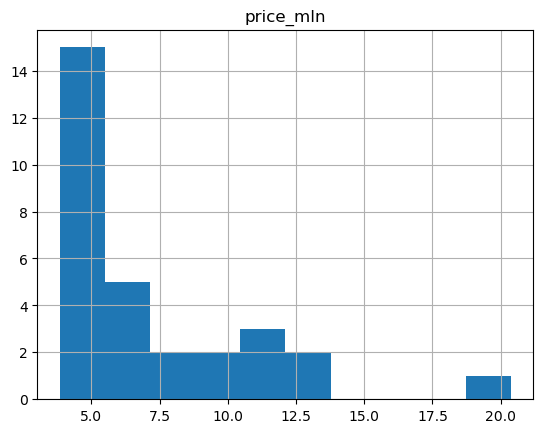

In [50]:
km_to_center = new_data[new_data['locality_name'] =='Санкт-Петербург']
km_to_center_group = km_to_center.pivot_table(index='city_centers_km', values='price_mln', aggfunc='mean')
display(km_to_center_group)
display(km_to_center_group.hist())
plt.show()

Проанализировав таблицу мы можем сделать вывод, что стоимость квартиры напрямую влияет на расстояние от цена города - чем недвижимость ближе к центру, тем выше стоимость и наоборот.  
Так, к примеру, средняя цены квартиры, находящаяся на расстоянии 29 км от центра города, стоит в 5 раз дороже той, которая находится в самом центре города.

## Общий вывод по анализу данных.

Благодаря проведенную анализу мы выяснили, что на стоимость квартиры напрямую зависит от:
- общей площади;
- жилой площади;
- этажа, на котором расположена квартира (первый, последний, другой);
- расстояние от центра города.



Никак не влияет на стоимость:
- количество комнат;
- день публикации объявления.

Интересные факты:
- в Санкт-Петербурге недвижимость, находящаяся на расстоянии 29км от центра, стоит в 5 раз дешевле, чем та, которая находится в самом центре;  
- в среднем на продажу недвижимости уходит 178 дней (6 месяцев). Самая быстрая продажа была за 1 день, а самая длительная продажа была через 1580 дней (4.4 года);
- самой высокой стоимостью является недвижимость, находящаяся в Зеленогорске, затем идёт Санкт-Петербург, замыкает тройку город Пушкин.

Полученные данные, полученные в ходе исследования, позволят найти взаимосвязь стоимости квартир от различных параметров и получить важные инсайты, которые позволят построить автоматизированную систему аномалий и мошеннической деятельности.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.